In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

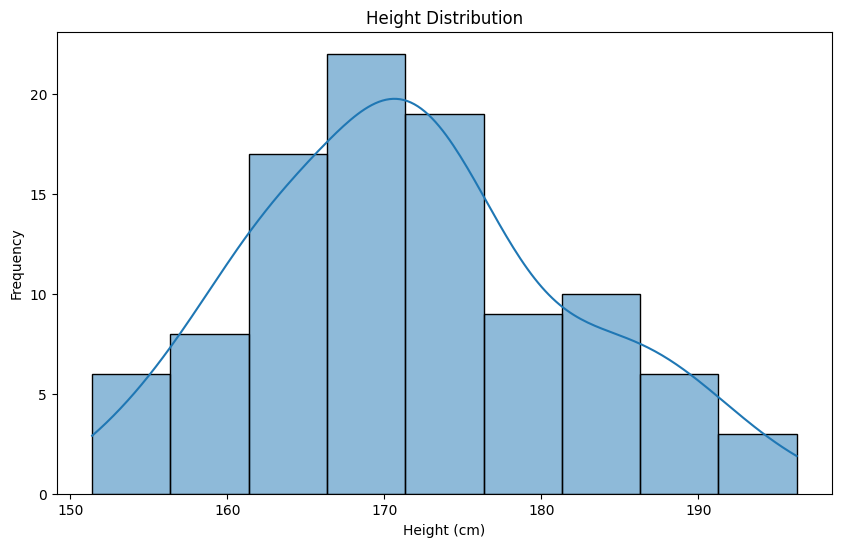

In [2]:
height = np.random.normal(loc=170, scale=10, size=100) # here loc means the mean height, scale means the standard deviation
plt.figure(figsize=(10, 6))
sns.histplot(height, kde=True)
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

In [6]:
# population between -1std to +1std
population = height[(height > (height.mean() - height.std())) & (height < (height.mean() + height.std()))]
population_percentage = (len(population) / len(height)) * 100
population_percentage

67.0

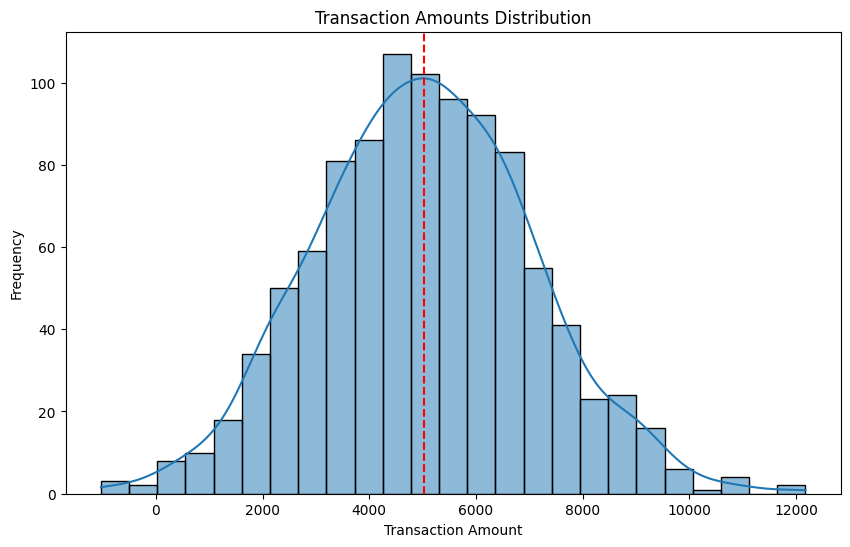

In [8]:
# lets use it top detect outliers

tx_data = np.random.normal(loc=5000, scale=2000, size=1000)
# add some outliers
tx_data = np.concatenate([tx_data, np.array([10000, 11000, 12000])])
mean = tx_data.mean()
plt.figure(figsize=(10, 6))
sns.histplot(tx_data, kde=True)
plt.axvline(mean, color='r', linestyle='--')
plt.title("Transaction Amounts Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


In [9]:
# anything more then 3 standard deviations from the mean
outliers = tx_data[(tx_data < (mean - 3 * tx_data.std())) | (tx_data > (mean + 3 * tx_data.std()))]
outliers


array([12173.49609461, 12000.        ])

In [10]:
# https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/empirical-rule/
# The empirical rule states that for a normal distribution:
# - Approximately 68% of the data falls within one standard deviation of the mean.
# - Approximately 95% falls within two standard deviations.
# - Approximately 99.7% falls within three standard deviations.